## THỰC HÀNH 3: HỒI QUY CƠ BẢN

# 1. Đọc dữ liệu

In [1]:
import pandas as pd
data = pd.read_csv('housing.csv')
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Câu 1: Dựa vào kết quả thu được, hãy cho biết khoảng min - max của biến mục
tiêu (median_house_value) trong bộ dữ liệu. Có nhận xét gì về miền giá trị của biến
mục tiêu? (giá trị min-max, mean, median như thế nào?)

<Axes: xlabel='median_house_value', ylabel='Count'>

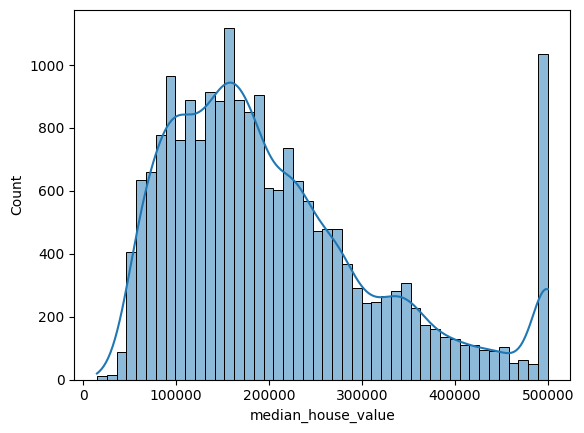

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['median_house_value'], kde=True)

Câu 2: Hãy cho biết bộ dữ liệu có bao nhiêu dòng, và có tổng cộng bao nhiêu
thuộc tính? Liệt kê ra các thuộc tính. 

In [4]:
data.shape

(20640, 10)

In [5]:
#count the number of arributes
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Câu 3: Cho biết số lượng các giá trị NA trong thuộc tính.

In [6]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# 2. Chuẩn bị dữ liệu huấn luyện

<Axes: >

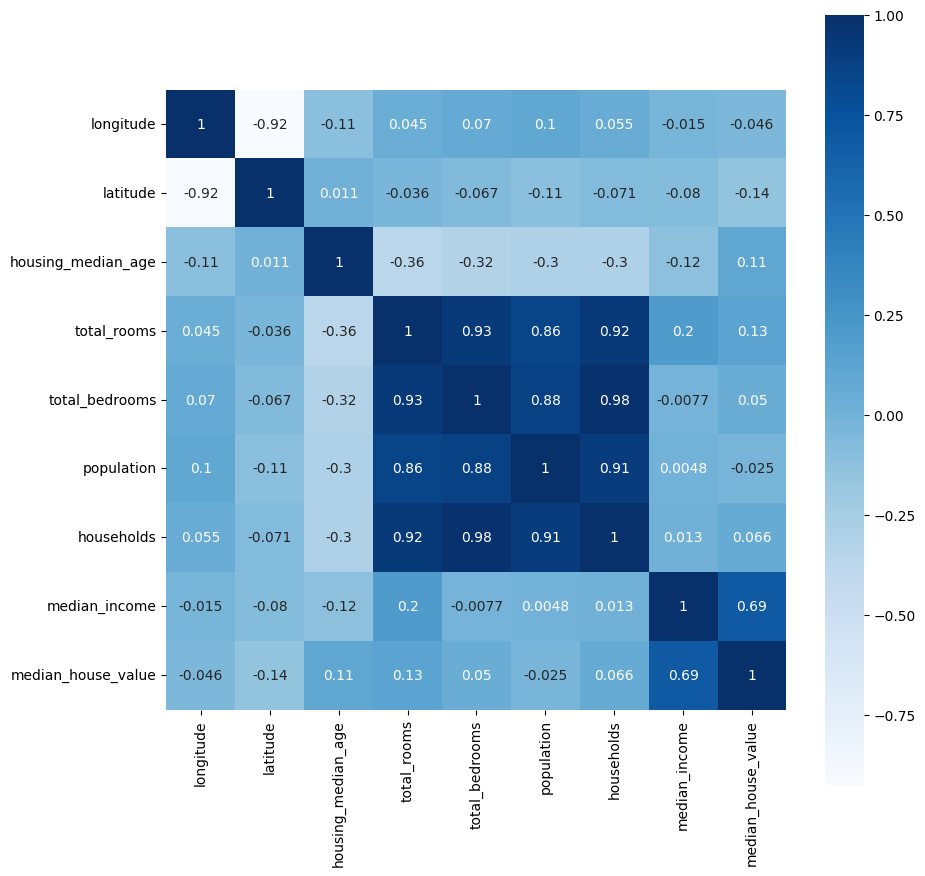

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# tinh su phu thuoc cua tung thuoc tinh
correlation = data.corr(method='pearson', numeric_only=True)
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

Câu 4: Vẽ ma trận tương quan giữa các thuộc tính và thể hiện lên màn hình theo
code gợi ý. Cho biết mức độ tương quan giữa các thuộc tính với nhau
Dựa vào mức độ tương quan, ta chọn ra được thuộc tính thu nhập bình quân -
median_income. 

<Axes: xlabel='median_income', ylabel='median_house_value'>

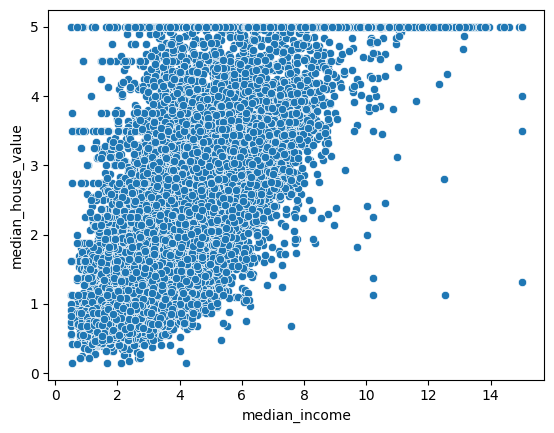

In [11]:
X_train = data['median_income']
y_train = data['median_house_value']
y_train_transformed = y_train / 100000.0
data_visualize = pd.DataFrame({"median_income": X_train, "median_house_value": y_train_transformed})
# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data_visualize, x="median_income", y="median_house_value")

Câu 5: Vẽ biểu đồ tán xạ (scatter plot) giữa thuộc tính median_income và thuộc
tính median_house_value.

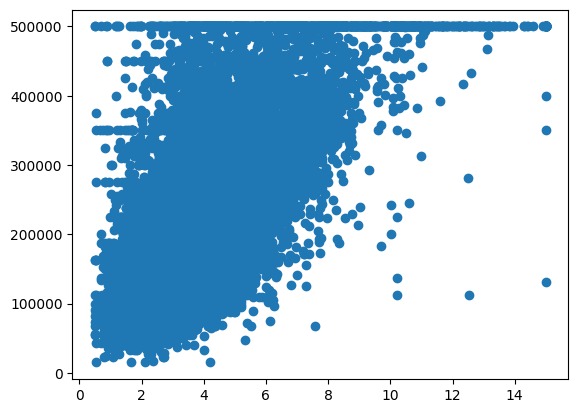

In [12]:
# scatter plot of median_income and median_house_value
X=data['median_income']
y=data['median_house_value']
plt.scatter(X,y)

Câu 6: Hãy phân chia dữ liệu huấn luyện (X,y) thành tập huấn luyện và tập kiểm
thử theo tỉ lệ lần lượt là 8-2. Cho biết chiều (shape) của từng tập dữ liệu.

In [13]:
#divine data into training and testing (8:2)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
X_train

4858     2.0870
3971     3.8839
2350     3.7697
15776    4.5052
9491     3.5917
          ...  
2376     1.7132
14637    2.3599
91       0.8668
6852     3.8644
20210    6.9483
Name: median_income, Length: 16512, dtype: float64

In [16]:
X_test.shape

(4128,)

In [17]:
y_train.shape

(16512,)

In [18]:
y_test.shape

(4128,)

# 3. Huấn luyện mô hình và kiểm thử

Chuẩn hoá lại miền giá trị của biến mục tiêu y_train và y_test.

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed = sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train_transformed)

LinearRegression()

Câu 7: Dự đoán kết quả cho tập kiểm tra dựa vào mô hình đã huấn luyện, kết quả
lưu vào biến y_pred.

In [23]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test.values.reshape(-1,1))
mean_squared_error(y_test_transformed, y_pred, squared =True)

90.05056983761737

<Axes: xlabel='median_income', ylabel='median_house_value'>

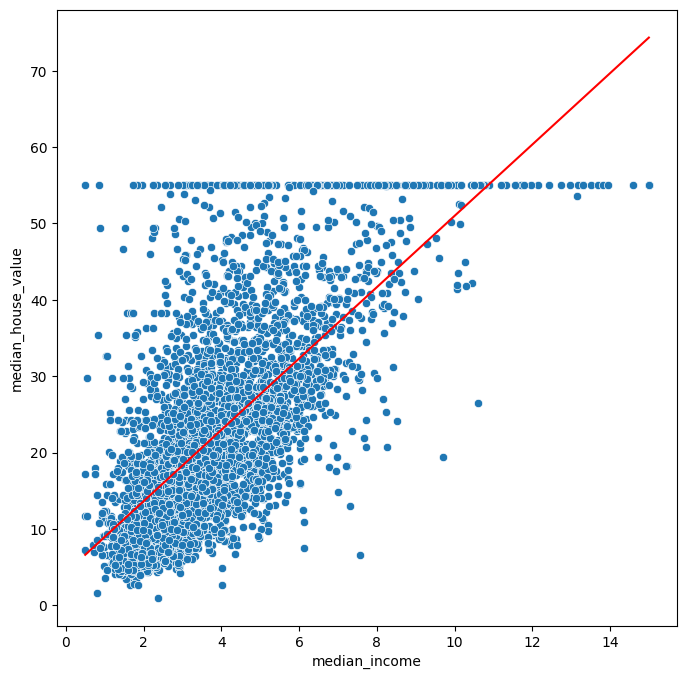

In [24]:
import seaborn as sns
test_true = pd.DataFrame({'median_income':X_test, 'median_house_value':y_test_transformed})
test_pred = pd.DataFrame({'median_income':X_test, 'median_house_value': y_pred})
fig= plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred, x="median_income",y="median_house_value", color='red')
sns.scatterplot(data=test_true, x="median_income",y="median_house_value")

# 4. Cross Validation

Câu 8: Thực hiện lại mô hình Hồi quy tuyến tính bằng phương pháp cross -
valiation. Cho biết kết quả cuối cùng theo độ đo MSE.

In [27]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
avg_mse = []
y_transformed = y.values.reshape(-1, 1)
for train_index, test_index in kf.split(X, y_transformed):
    X_train = X.values[train_index].reshape(-1,1)
    y_train = y_transformed[train_index]
    X_test = X.values[test_index].reshape(-1,1)
    y_test = y_transformed[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_squared_error(y_test, y_pred, squared=True)
    # Lưu lại kế t quả từng fold vào avg_mse
    avg_mse.append(result)

In [29]:
import numpy as np
np.mean(np.array(avg_mse))

7057328130.442302

# 5. Bài tập

Bài 1: Thực hiện lại 7 câu hỏi trong bài hướng dẫn.

Bài 2: Thực hiện dự đoán giá nhà dựa vào thuộc tính total_bedrooms (tổng số phòng
ngủ trong ngôi nhà).

In [30]:
#predict price of house base in total_bedrooms
#process null values using simple imputer
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
X2 = data['total_bedrooms']
X_processed = imputer.fit_transform(X2.values.reshape(-1,1))[:,0]
#MAKE X_processed like X2
X_processed = pd.Series(X_processed)
X_processed = X_processed.astype('float64')
from sklearn.model_selection import train_test_split
X2_train,X2_test,y_train,y_test=train_test_split(X_processed,y,test_size=0.2)

In [31]:
X_processed

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Length: 20640, dtype: float64

In [32]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X2_train.values.reshape(-1,1), y_train_transformed)

LinearRegression()

In [33]:
from sklearn.metrics import mean_squared_error
y_pred2 = model2.predict(X2_test.values.reshape(-1,1))
mean_squared_error(y_test_transformed, y_pred2, squared =True)

166.95512433156614

<Axes: xlabel='total_bedrooms', ylabel='median_house_value'>

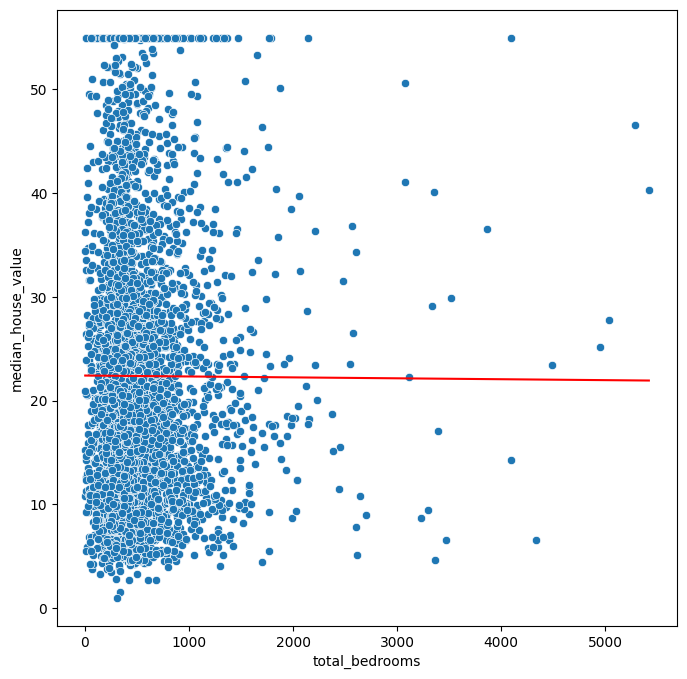

In [34]:
import seaborn as sns
test_true2 = pd.DataFrame({'total_bedrooms':X2_test, 'median_house_value':y_test_transformed})
test_pred2 = pd.DataFrame({'total_bedrooms':X2_test, 'median_house_value': y_pred2})
fig2= plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred2, x="total_bedrooms",y="median_house_value", color='red')
sns.scatterplot(data=test_true2, x="total_bedrooms",y="median_house_value")

In [36]:
#evaluate model1 and model2 using cross validation with 5 folds
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model, X_train.reshape(-1,1), y_train_transformed, cv=5, scoring='neg_mean_squared_error')
scores2 = cross_val_score(model2, X2_train.values.reshape(-1,1), y_train_transformed, cv=5, scoring='neg_mean_squared_error')
print(scores1)
print(scores2)

[-167.41985975 -168.83517172 -167.17192145 -156.45657158 -165.61036478]
[-167.45007015 -169.02375707 -167.19511603 -156.47552306 -165.56557526]


Nhận xét: kết quả khi dự đoán bằng median_income có giá trị gần đúng hơn so với kết quả khi dự đoán bằng total_bedrooms

Bài 3*: Hãy thử kết hợp 2 thuộc tính total_bedrooms và median_income lại với nhau,
và so sánh kết quả với Bài 1 và Bài 2. Sử dụng cross validation với 10 lần chia
(n_splits=10).

In [38]:
# multiple linear regression model using 2 attributes median_income and total_bedrooms
X3 = pd.concat([X, X_processed], axis=1)
X3.columns = X3.columns.astype(str)
from sklearn.model_selection import train_test_split
X3_train,X3_test,y_train,y_test=train_test_split(X3,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X3_train, y_train_transformed)

LinearRegression()

In [39]:
#predict using model3 with cross validation with n_splits = 10
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(model3, X3_train, y_train_transformed, cv=10, scoring='neg_mean_squared_error')
print(scores3)

[-169.35743747 -165.33430933 -158.9744379  -178.94144594 -168.17346053
 -166.27114297 -152.96359045 -159.81869648 -165.97549757 -165.16717199]


Nhận xét: sử dụng kết hợp 2 thuộc tính thì kết quả ra có độ chính xác cao hơn khi sử dụng biến total_bedrooms nhưng lại thấp hơn khi dùng biến median_income.

Bài 4*: Hãy tìm hiểu về Ridge Regression và cài đặt cho bài toán. Có nhận xét gì về
kết quả thu được của mô hình Ridge Regression so với Linear Regression?

In [42]:
# use ridge regression to predict with atrributes median_income
from sklearn.linear_model import Ridge
model4 = Ridge(alpha=0.1)
model4.fit(X_train.reshape(-1,1), y_train_transformed)

from sklearn.metrics import mean_squared_error
y_pred4 = model4.predict(X_test.reshape(-1,1))
mean_squared_error(y_test_transformed, y_pred4, squared =True)

167.04053770176608

Nhận xét: kết quả khá tương đồng khi sử dụng biến median_income để predict cho 2 mô hình trên.

Bài 5*: Hãy tìm hiểu về RandomForestRegressor và cài đặt cho bài toán. Hãy dùng
chiến lược GridSearchCV để tìm ra siêu tham số tối ưu cho mô hình.

In [ ]:
# use ramdom forest to predict with atrributes median_income, use girdsearchcv to find best parameters for model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model5 = RandomForestRegressor()
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 20, 30, 40, 50]}
grid = GridSearchCV(model5, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train.reshape(-1,1), y_train_transformed)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
model5 = grid.best_estimator_
model5.fit(X_train.reshape(-1,1), y_train_transformed)

from sklearn.metrics import mean_squared_error
y_pred5 = model5.predict(X_test.values.reshape(-1,1))
mean_squared_error(y_test_transformed, y_pred5, squared =True)